# 티머니 카드&페이 -> 이용안내 -> 대중교통 통계자료
- 출근시간대인 7시 ~ 9시 / 퇴근시간대인 오후 18시 ~ 20시

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

In [3]:
# 한글폰트 설정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
# 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp\ipykernel_6400\2863771375.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [4]:
df = pd.read_csv("data/2022_01_시간대별 교통카드 통계자료.csv", encoding = 'cp949')

In [5]:
df.head()

,사용월,호선명,역ID,지하철역,4시_승차,4시_하차,5시_승차,5시_하차,6시_승차,6시_하차,...,20시_승차,20시_하차,21시_승차,21시_하차,22시_승차,22시_하차,23시_승차,23시_하차,24시_승차,24시_하차
0,Jan-22,1호선,1,서울역,530,14,"7,194","5,587","10,201","34,337",...,"60,773","31,581","71,463","34,893","29,558","14,807","8,521","5,862",28,506
1,Jan-22,1호선,10,동묘앞,111,1,"2,206",727,"2,815","3,923",...,"4,923","4,372","4,308","5,958","2,616","3,634",866,"1,774",4,854
2,Jan-22,1호선,2,시청,27,0,"1,610","4,157","2,623","17,377",...,"40,906","4,190","45,218","5,342","12,194","1,997","2,405",912,8,99
3,Jan-22,1호선,3,종각,87,2,"1,954","3,686","2,712","19,130",...,"79,392","5,874","97,044","5,648","22,175","2,401","4,526","1,133",6,124
4,Jan-22,1호선,4,종로3가,124,15,"2,110","2,375","2,416","10,706",...,"46,301","5,191","58,233","6,258","14,178","2,577","2,951","1,402",33,345


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     610 non-null    object
 1   호선명     610 non-null    object
 2   역ID     610 non-null    int64 
 3   지하철역    610 non-null    object
 4   4시_승차   610 non-null    object
 5   4시_하차   610 non-null    int64 
 6   5시_승차   610 non-null    object
 7   5시_하차   610 non-null    object
 8   6시_승차   610 non-null    object
 9   6시_하차   610 non-null    object
 10  7시_승차   610 non-null    object
 11  7시_하차   610 non-null    object
 12  8시_승차   610 non-null    object
 13  8시_하차   610 non-null    object
 14  9시_승차   610 non-null    object
 15  9시_하차   610 non-null    object
 16  10시_승차  610 non-null    object
 17  10시_하차  610 non-null    object
 18  11시_승차  610 non-null    object
 19  11시_하차  610 non-null    object
 20  12시_승차  610 non-null    object
 21  12시_하차  610 non-null    object
 22  13시_승차  610 non-null    ob

In [148]:
# df = df.astype({'호선명' : 'string'})
# df = df.astype({'지하철역' : 'string'})

In [149]:
# 필요한 데이터만 뽑기
# df_arrive = 7시, 8시, 9시 데이터
columns = ['호선명', '지하철역', '7시_승차','7시_하차','8시_승차','8시_하차', '9시_승차','9시_하차']
df_arrive = df[columns].copy()

# df_depart = 18시, 19시, 20시 데이터
columns1 = ['호선명', '지하철역', '18시_승차','18시_하차','19시_승차','19시_하차', '20시_승차','20시_하차']
df_depart = df[columns1].copy()

In [150]:
# str로 변환 -> , 제거 -> int형으로 변환
# int형 변환 이유 : 최댓값을 찾기 위해서

df_arrive = df_arrive.astype({'7시_승차' : 'str'})
df_arrive = df_arrive.astype({'7시_하차' : 'str'})
df_arrive = df_arrive.astype({'8시_승차' : 'str'})
df_arrive = df_arrive.astype({'8시_하차' : 'str'})
df_arrive = df_arrive.astype({'9시_승차' : 'str'})
df_arrive = df_arrive.astype({'9시_하차' : 'str'})

df_arrive['7시_승차'] = df_arrive['7시_승차'].str.replace(',', '') # 공백 없애기
df_arrive['7시_하차'] = df_arrive['7시_하차'].str.replace(',', '') # 공백 없애기
df_arrive['8시_승차'] = df_arrive['8시_승차'].str.replace(',', '') # 공백 없애기
df_arrive['8시_하차'] = df_arrive['8시_하차'].str.replace(',', '') # 공백 없애기
df_arrive['9시_승차'] = df_arrive['9시_승차'].str.replace(',', '') # 공백 없애기
df_arrive['9시_하차'] = df_arrive['9시_하차'].str.replace(',', '') # 공백 없애기

df_arrive = df_arrive.astype({'7시_승차' : 'int'})
df_arrive = df_arrive.astype({'7시_하차' : 'int'})
df_arrive = df_arrive.astype({'8시_승차' : 'int'})
df_arrive = df_arrive.astype({'8시_하차' : 'int'})
df_arrive = df_arrive.astype({'9시_승차' : 'int'})
df_arrive = df_arrive.astype({'9시_하차' : 'int'})

In [151]:
df_depart = df_depart.astype({'18시_승차' : 'str'})
df_depart = df_depart.astype({'18시_하차' : 'str'})
df_depart = df_depart.astype({'19시_승차' : 'str'})
df_depart = df_depart.astype({'19시_하차' : 'str'})
df_depart = df_depart.astype({'20시_승차' : 'str'})
df_depart = df_depart.astype({'20시_하차' : 'str'})

df_depart['18시_승차'] = df_depart['18시_승차'].str.replace(',', '') # 공백 없애기
df_depart['18시_하차'] = df_depart['18시_하차'].str.replace(',', '') # 공백 없애기
df_depart['19시_승차'] = df_depart['19시_승차'].str.replace(',', '') # 공백 없애기
df_depart['19시_하차'] = df_depart['19시_하차'].str.replace(',', '') # 공백 없애기
df_depart['20시_승차'] = df_depart['20시_승차'].str.replace(',', '') # 공백 없애기
df_depart['20시_하차'] = df_depart['20시_하차'].str.replace(',', '') # 공백 없애기

df_depart = df_depart.astype({'18시_승차' : 'int'})
df_depart = df_depart.astype({'18시_하차' : 'int'})
df_depart = df_depart.astype({'19시_승차' : 'int'})
df_depart = df_depart.astype({'19시_하차' : 'int'})
df_depart = df_depart.astype({'20시_승차' : 'int'})
df_depart = df_depart.astype({'20시_하차' : 'int'})

In [152]:
df_arrive.head()

,호선명,지하철역,7시_승차,7시_하차,8시_승차,8시_하차,9시_승차,9시_하차
0,1호선,서울역,30952,78629,50863,172417,41295,111532
1,1호선,동묘앞,4877,6311,8215,14327,6954,14305
2,1호선,시청,5704,52313,7236,155471,7552,70487
3,1호선,종각,4579,84536,8362,201196,9704,115947
4,1호선,종로3가,3664,20452,6359,64067,11039,63900


In [153]:
# 가장 최대값인 행 남겨두기 (7시, 8시, 9시)
df_7 = df_arrive[df_arrive['7시_승차'] == df_arrive['7시_승차'].max()] # [['지하철역','7시_승차']]
df_7_d = df_arrive[df_arrive['7시_하차'] == df_arrive['7시_하차'].max()]
df_8 = df_arrive[df_arrive['8시_승차'] == df_arrive['8시_승차'].max()]
df_8_d = df_arrive[df_arrive['8시_하차'] == df_arrive['8시_하차'].max()]
df_9 = df_arrive[df_arrive['9시_승차'] == df_arrive['9시_승차'].max()]
df_9_d = df_arrive[df_arrive['9시_하차'] == df_arrive['9시_하차'].max()]

In [154]:
# 가장 최대값인 행 남겨두기 (18시, 19시, 20시)
df_18 = df_depart[df_depart['18시_승차'] == df_depart['18시_승차'].max()] # [['지하철역','7시_승차']]
df_18_d = df_depart[df_depart['18시_하차'] == df_depart['18시_하차'].max()]
df_19 = df_depart[df_depart['19시_승차'] == df_depart['19시_승차'].max()]
df_19_d = df_depart[df_depart['19시_하차'] == df_depart['19시_하차'].max()]
df_20 = df_depart[df_depart['20시_승차'] == df_depart['20시_승차'].max()]
df_20_d = df_depart[df_depart['20시_하차'] == df_depart['20시_하차'].max()]

In [155]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 39 to 39
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선명     1 non-null      object
 1   지하철역    1 non-null      object
 2   7시_승차   1 non-null      int32 
 3   7시_하차   1 non-null      int32 
 4   8시_승차   1 non-null      int32 
 5   8시_하차   1 non-null      int32 
 6   9시_승차   1 non-null      int32 
 7   9시_하차   1 non-null      int32 
dtypes: int32(6), object(2)
memory usage: 48.0+ bytes


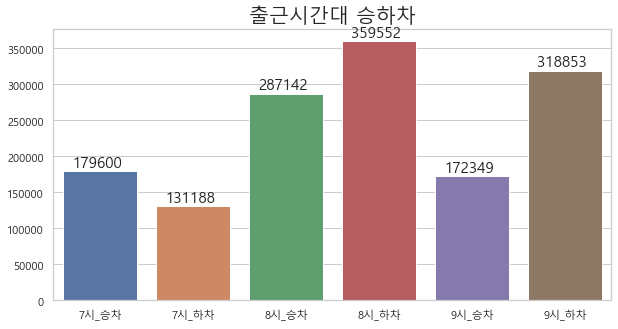

In [160]:
# 어느시간대에 가장 많이 승하차를 하는지 알아보기

x = ["7시_승차", "7시_하차", "8시_승차", "8시_하차", "9시_승차", "9시_하차"]
y = [df_arrive['7시_승차'].max(), df_arrive['7시_하차'].max(), df_arrive['8시_승차'].max(), df_arrive['8시_하차'].max(), df_arrive['9시_승차'].max(), df_arrive['9시_하차'].max()]

plt.figure(figsize=(10,5))
plt.title("출근시간대 승하차", fontsize = 20)
# plt.plot(x, y, 'b:', label='count')

sns.barplot(x = x,y = y)
for index, value in enumerate(y):
    plt.text(index - 0.3, value, str(value), fontsize = 15, verticalalignment='bottom')
plt.show()

# 8시에 가장 많이 승하차를 한다는 것을 알 수 있다.

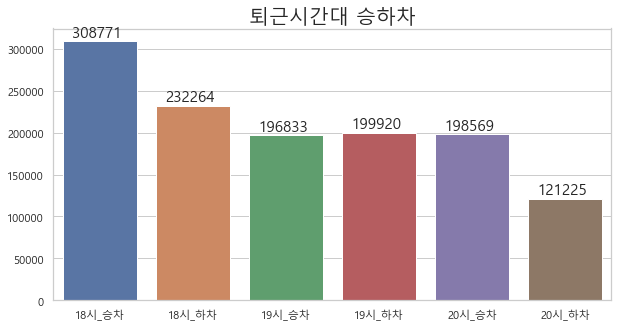

In [161]:
# 어느시간대에 가장 많이 승하차를 하는지 알아보기

x = ["18시_승차", "18시_하차", "19시_승차", "19시_하차", "20시_승차", "20시_하차"]
y = [df_depart['18시_승차'].max(), df_depart['18시_하차'].max(), df_depart['19시_승차'].max(), df_depart['19시_하차'].max(), df_depart['20시_승차'].max(), df_depart['20시_하차'].max()]

plt.figure(figsize=(10,5))
plt.title("퇴근시간대 승하차", fontsize = 20)

sns.barplot(x = x,y = y)
for index, value in enumerate(y):
    plt.text(index - 0.3, value, str(value), fontsize = 15, verticalalignment='bottom')
plt.show()

# 6시에 가장 많이 승하차를 한다는 것을 알 수 있다.